<a href="https://colab.research.google.com/github/nachotp/AI-project-TOP/blob/master/Tarea%201/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1

## Reconocimiento de Patrones en Minería de Datos

Ignacio Tampe Palma - 201573514-k

Franco Zalavari Palma - 201573501-8

---

# Parte 1

In [0]:
!pip install scikit-fuzzy
import pandas as pd
import sklearn.cluster as cs
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy.cluster as fuzz
from ipywidgets import interact
import ipywidgets as widgets

% matplotlib inline

# Exploración visual de sets de datos

## Mouse Dataset

In [0]:
# Carga de Datasets
mouse = pd.read_csv("https://raw.githubusercontent.com/nachotp/Data-mining-patterns/master/Tarea%201/datasets/mouse.txt", sep="\t", index_col=False, names=["x", "y"])
smile = pd.read_csv("https://raw.githubusercontent.com/nachotp/Data-mining-patterns/master/Tarea%201/datasets/smile.txt", sep="\t", index_col=False, names=["x", "y"])
spiral = pd.read_csv("https://raw.githubusercontent.com/nachotp/Data-mining-patterns/master/Tarea%201/datasets/spiral.txt", sep="\t", index_col=False, names=["x", "y"])

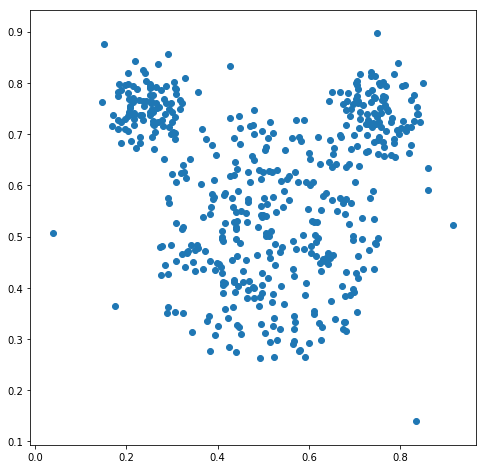

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(mouse.x, mouse.y)
plt.show();

A primera impresión se pueden ver 3 sectores candidatos a clusters de forma globular, los 2 más pequeños muestran una mayor densidad que el sector más grande del centro. Algunos elementos podrían ser considerados *outliers*.

## Smile Dataset

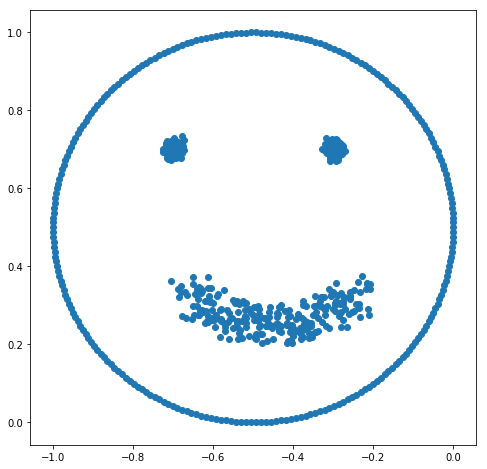

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(smile.x, smile.y)
plt.show();

Al estudiar el dataset, se pueden ver 4 sectores candidatos a clusters, los dos más pequeños de forma globular bien densos, uno en forma de medialuna con menor densidad y por último uno con forma de anillo. Visualmente, no se consideran *outliers* para este dataset.

## Spiral Dataset

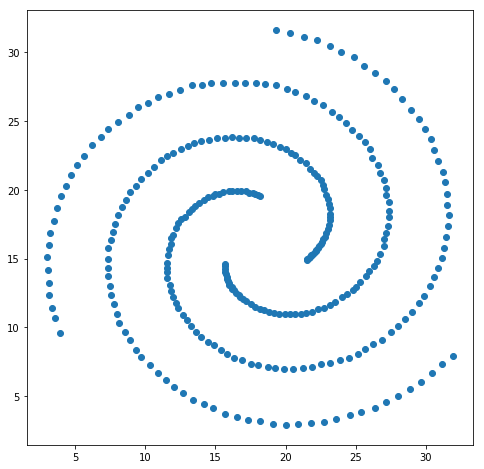

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(spiral.x, spiral.y)
plt.show();

Este dataset muestra 3 posibles candidatos a clusters con forma curvilínea, a medida que los datos se aproximan al centro, la densidad empieza a aumentar. Visualmente, no se consideran *outliers* para este dataset.

# Algoritmos de Clustering

In [0]:
def Kmeans_clustering(dataset, clusters= 3,initial ='k-means++',ninit=10, max_i =300, tolerance=0.0001, predist='auto', verb=0, randstate=None, copy =True, jobs=None, algo ='auto'):
  clustering = cs.KMeans(n_clusters = clusters,init = initial, n_init = ninit, max_iter = max_i, tol= tolerance, precompute_distances = predist, verbose = verb, random_state = randstate, copy_x = copy, n_jobs = jobs, algorithm = algo).fit(dataset)
  labels = clustering.labels_
  centroids = clustering.cluster_centers_
  plt.scatter(dataset.x, dataset.y, c=labels, s=50, cmap='viridis')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, alpha=0.9)
  plt.show()
  print("Iteraciones realizadas: " + str(clustering.n_iter_))

def Agglomerative_clustering(dataset, clusters=3, aff ='euclidean', mem =None, connect =None, full_tree='auto', link='single', pooling ='deprecated'):
  clustering = cs.AgglomerativeClustering(n_clusters=clusters, affinity=aff, memory=mem, connectivity=connect, compute_full_tree=full_tree, linkage=link, pooling_func=pooling).fit(dataset)
  labels = clustering.labels_
  plt.scatter(dataset.x, dataset.y, c=labels, s=50, cmap='viridis')
  
def DBSCAN_clustering(dataset, dist = 0.1, samples_min =5, metrica ='euclidean', metparams=None, algo ='auto', leaf_tam =30, power=None, jobs=None):
  clustering = cs.DBSCAN(eps=dist, min_samples=samples_min, metric=metrica, metric_params=metparams, algorithm=algo, leaf_size=leaf_tam, p=power, n_jobs=jobs).fit(dataset)
  labels = clustering.labels_
  plt.scatter(dataset.x, dataset.y, c=labels, s=50, cmap='viridis')

def MeanShift_clustering(dataset, band =None, seed =None, binseeding=False, min_freq=1, clusterall=True, jobs=None):
  clustering = cs.MeanShift(bandwidth=band, seeds=seed, bin_seeding=binseeding, min_bin_freq= min_freq, cluster_all=clusterall, n_jobs=jobs).fit(dataset)
  labels = clustering.labels_
  centroids = clustering.cluster_centers_
  plt.scatter(dataset.x, dataset.y, c=labels, s=50, cmap='viridis')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, alpha=0.9);
  
def Spectral_clustering(dataset, clusters=3, eigensolver=None, randomstate=None, ninit=10, gam=1.0, aff='rbf', nneighbors=10, eigentol=0.0, assignlabels='kmeans', deg=3, coef=1, kernelparams=None, njobs=None):
  clustering = cs.SpectralClustering(n_clusters=clusters, eigen_solver=eigensolver, random_state=randomstate, n_init=ninit, gamma=gam, affinity=aff, n_neighbors=nneighbors, eigen_tol=eigentol, assign_labels=assignlabels, degree=deg, coef0=coef, kernel_params=kernelparams, n_jobs=njobs).fit(dataset)
  labels = clustering.labels_
  plt.scatter(dataset.x, dataset.y, c=labels, s=50, cmap='viridis')

def Fuzzy_clustering(dataset, membership, stop_crit, itermax, clusters =  3, initial=None, seeds=None):
  alldata = np.vstack((dataset.x, dataset.y))
  centroids, u, _, _, _, _, _ = fuzz.cmeans(data = alldata, c = clusters,  m = membership, error = stop_crit, maxiter = itermax, init=initial, seed=seeds)
  cluster_membership = np.argmax(u, axis=0)
  plt.scatter(dataset.x, dataset.y, c=cluster_membership, s=50, cmap='viridis')
  for pt in centroids:
    plt.plot(pt[0], pt[1], 'rs')

## Mouse Dataset

### K-Means

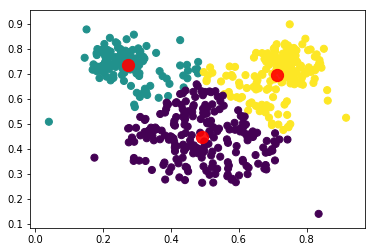

Iteraciones realizadas: 8


In [0]:
Kmeans_clustering(mouse)

Al funcionar basado en centroides que agrupan según distancia, no se logran identificar las regiones circulares más densas de forma correcta y se divide la sección principal en 3 porciones.

### Agglomerative Clustering

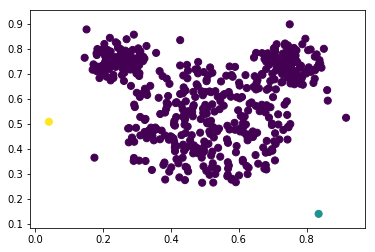

In [0]:
Agglomerative_clustering(mouse, link = 'single', aff = 'manhattan')

Se puede notar que el algoritmo no es capaz de identificar los clusters de forma correcta ya que la distancia entre los puntos más cercanos (por usar single link) forma un cluster captura a casi todos los elementos y fueron 2 outliers los que quedaron definidos como los otros 2 clusters.





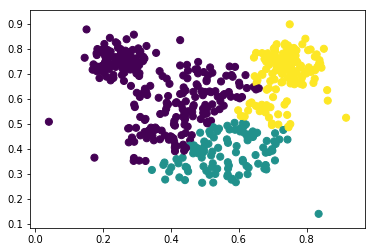

In [0]:
Agglomerative_clustering(mouse, link = 'complete', aff = 'manhattan')

El uso de Complete link mejoró el resultado debido a la naturaleza de la distancia entre los puntos más lejanos entre cada cluster, de todas formas no logra encontrar las formas globulares que caracterizan al dataset ya que fraccionan el círculo central en 3 clusters distintos.


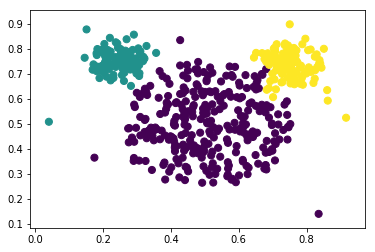

In [0]:
Agglomerative_clustering(mouse, link = 'ward', aff = 'euclidean')

Probando el uso de Ward Linkage con distancia euclidiana, permitió identificar de forma bien definida los 3 sectores de la imagen con clusters globulares. Esto se debe a que se busca la varianza mínima usando el método de Ward y por ende se logra agrupar de mejor manera los puntos

### DBSCAN

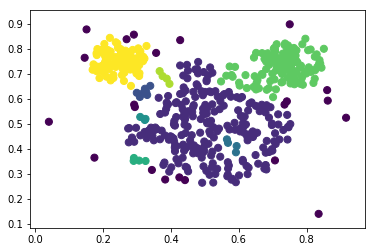

In [0]:
DBSCAN_clustering(mouse, dist = 0.043, samples_min = 3, metrica = 'manhattan')

DBSCAN, pese a encontrar de forma parcial las estructuras circulares esperadas, agregó clusters extra que incluyen pocos elementos. Esto se debe a la naturaleza del parametro de densidad y vecinos, el dataset presenta sectores de distinta densidad lo que implica que no se pueden encontrar los clusters correctamente.

### Mean Shift

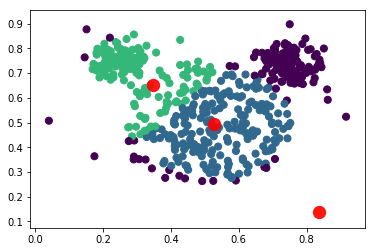

In [0]:
MeanShift_clustering(mouse, clusterall = False, min_freq= 3)

La utilización de Mean Shift sobre el dataset no fue efectivo para encontrar clusters, debido a que los centroides no se distribuyeron de una forma que permitiera definir las clusters correctamente. Esto conllevo a que los puntos del borde fueran agrupados con elementos más lejanos.

### Spectral Clustering

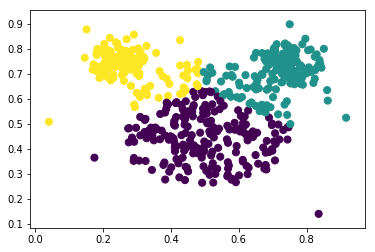

In [0]:
Spectral_clustering(mouse)

Spectral Clustering con grafo completo dio resultados parecidos a K-Means, identificando 3 clusters pero no es capaz de notar la forma circular que destaca a la zona central por lo que la parte superior es dividida entre los otros dos clusters. Esto se debe a que la distribución de los datos no favorece una representación de grafo por la variedad de densidad y cercanía entre los puntos

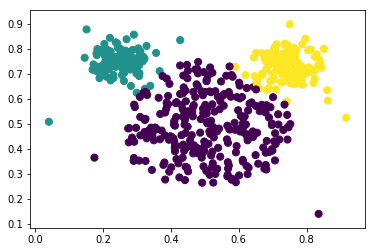

In [0]:
Spectral_clustering(mouse, clusters = 3, aff="nearest_neighbors", nneighbors=30)

El uso de K-Vecinos para generar el el grafo que utiliza Spectral Clustering permite identificar los 3 clusters ya que las 2 zonas circulares más pequeñas tienen mayor densidad que la central y por ende se agrupan en ese sector


### Fuzzy Clustering

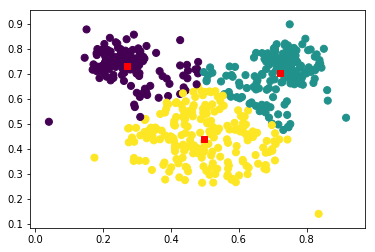

In [0]:
Fuzzy_clustering(mouse, membership = 2 ,stop_crit=0.005, itermax=1000, initial=None)

Nuevamente se tienen resultados parecidos al aplicar Fuzzy Clustering, con la misma limitación que K-Means de no poder delimitar los sectores circulares de forma apropiada ya que su comportamiento de centroides es similiar a K-Means.

* Se tomó el cluster con mayor grado de pertenencia para graficar cada punto.

## Smile Dataset

### K-Means

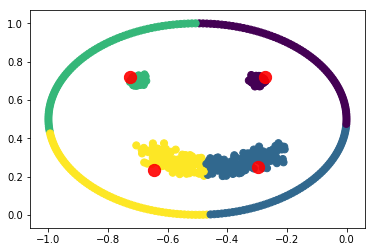

Iteraciones realizadas: 17


In [0]:
Kmeans_clustering(smile, clusters = 4)

Al funcionar en base a distancia, K-Means divide el dataset en 4 sectores globulares. Estos no representan la organización de los datos puesto a que no es capaz de identificar clusters que no sean circulares, por ende resulta en un mal método para clustering.

### Agglomerative Clustering

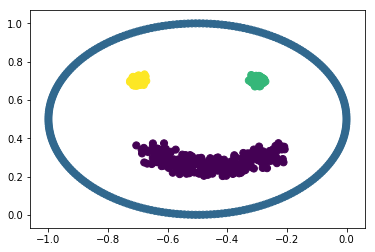

In [0]:
Agglomerative_clustering(smile, link = 'single', aff = 'manhattan', clusters = 4)

Clustering aglomerativo con *single link*  logró indentificar los 4 clusters sin error ya que agloramera usando los puntos más cercanos. Esto es últil para este dataset porque las regiones están claramente definidas.

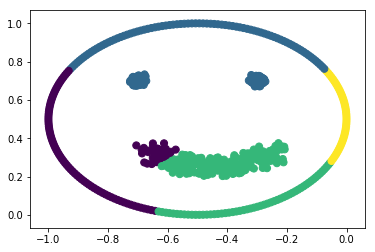

In [0]:
Agglomerative_clustering(smile, link = 'complete', aff = 'manhattan', clusters = 4)

Como complete link considera la distancia máxima entre clusters, la aglomeración no permite identificar las zonas correctamentes ya que las distancias entre cada sector varían notablemente.

### DBSCAN

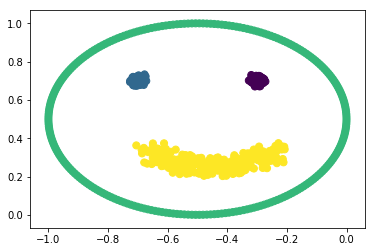

In [0]:
DBSCAN_clustering(smile)

Como DBSCAN funciona según la densidad, en este dataset se puede rápidamente encontrar los clusters puesto a que están bien definidos y no hay ruido. Las distancias entre cada zona permiten que la densidad sea un criterio útil para detectar los clusters y no sea tan sensible a los parámetros

### Meanshift

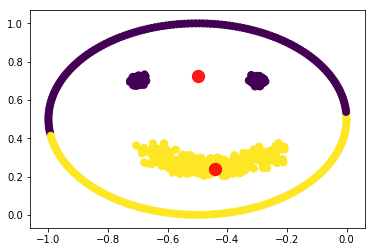

In [0]:
MeanShift_clustering(smile, clusterall = True)

Dado el mecanismo de Meanshift, que utiliza centroides que avanzan a sectores máyor densidad, no se logran identificar los clusters correctamente puesto a que los clusters convergen en la posición de ojos y la boca ya que son las regiones más densas. El anillo no debe aportar en el proceso de *clustering*  ya que en ambos ejes es igual de denso

### Spectral Clustering

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


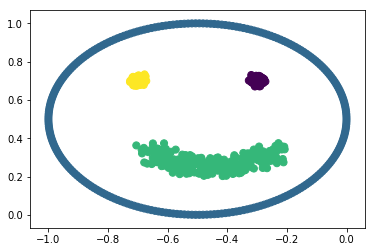

In [0]:
Spectral_clustering(smile, clusters = 4, aff="nearest_neighbors", nneighbors=5)

Dado que Spectral Clustering funciona en base a representación de grafos, si se usa K-Vecinos para armar el grafo, se logra identificar los clusters correspondientes ya que las zonas de potenciales clusters están bien delimitadas, sin ruido y con harta distancias.

### Fuzzy Clustering

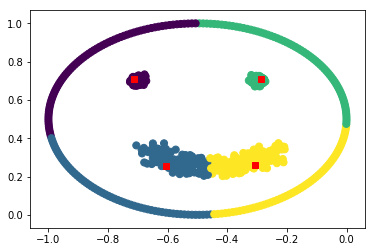

In [0]:
Fuzzy_clustering(smile, membership = 2 ,stop_crit=0.005, itermax=1000, initial=None, clusters = 4)

Aplicar Fuzzy Clustering trae consigo un comportamiento similar a K-Means, puesto a que es incapaz de encontrar clusters no globulares como es el anillo que rodea el dataset.

* Se tomó el cluster con mayor grado de pertenencia para graficar cada punto.

## Spiral Dataset

### K-Means

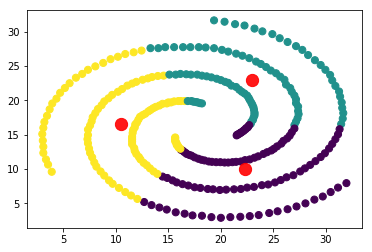

Iteraciones realizadas: 8


In [0]:
Kmeans_clustering(spiral)

K-means se ve limitado en este caso, debido a que su modelo de agrupamiento se basa en la generación de clusters esféricos, en los cuales el centroide se basa en la media del grupo. Por lo cual, aunque se varien los parámetros, K-means no podrá identificar los 3 clusters correctamente.

### Agglomerative Clustering

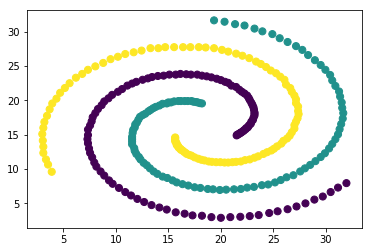

In [0]:
Agglomerative_clustering(spiral, link = 'single', aff = 'manhattan')


Debido a la función de distancia utilizada con Single Link, se obtienen buenos resultados con este algortimo para formas no globulares. Este algoritmo tiende a ser más sensible al ruido y outliers, sin embargo, en este caso no existen por lo cual funciona de buena manera.

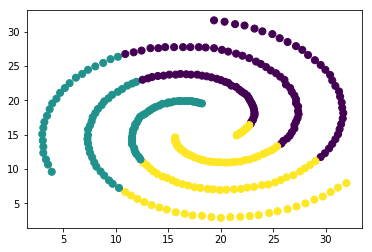

In [0]:
Agglomerative_clustering(spiral, link = 'complete', aff = 'manhattan')

Al buscar la distancia máxima, complete link no es capaz de detectar los clusters espirales y actúa de forma similar a K-means, identificando clusters de forma más globular, lo que no representa la forma del dataset

### DBSCAN

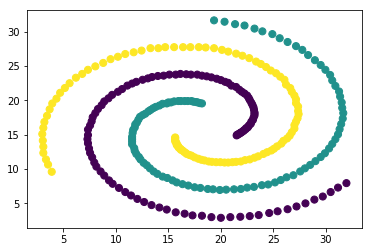

In [0]:
DBSCAN_clustering(spiral, dist = 2, samples_min = 1, metrica = 'manhattan')

Pese a que la densidad de la espiral varía a medida que uno se acerca el centro, la variación sigue siendo mucho menor que la distancia que separa a las 3 curvas, por esto que DBSCAN logra identificar los clusters de forma correcta. Mientras la distancia máxima para buscar vecinos permita agrupar a los elementos más lejanos del centro, va a poder realizar los clusters

### MeanShift

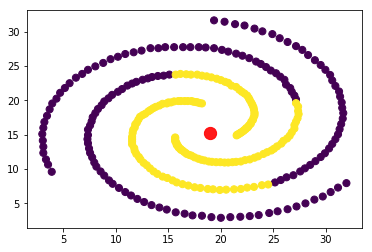

In [0]:
MeanShift_clustering(spiral, clusterall = False)

La densidad de la espiral es mayor a medida que uno se acerca al centro, es por esto que MeanShift converge en el punto central y no es capaz de identificar los brazos de la espiral ya que tienen menor densidad.

### Spectral Clustering

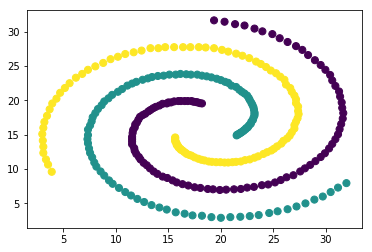

In [0]:
Spectral_clustering(spiral)

Considerando la representación de grafo en la que se basa Spectral Clustering y la separación entre cada brazo de la espiral, se logra un excelente desempeño ya que un grafo logra retratar correctamente los 3 brazos de la espiral

### Fuzzy Clustering

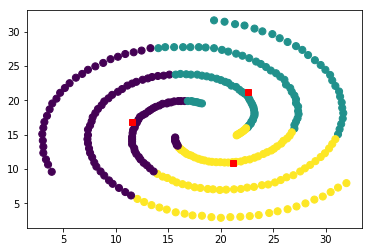

In [0]:
Fuzzy_clustering(spiral, membership = 3 ,stop_crit=0.005, itermax=1000, initial=None)

Como los clusters tienen forma de curva, Fuzzy C-Means no es capaz identificar los clusters y divide el dataset en 3 porciones que dividen el centro de forma radial. Este comportamiento se asemeja a K-Means y Agglomerative clustering con complete link

# Parte 2

## a) 
Esto podría ocurrir de las siguientes formas: Los objetos se encuentran concentrados todos en un lugar muy cercano, con un centroide ubicado cerca de estos, y el resto de los $k-1$ centroides lejos de los mismos.
Otra opción sería algo similar. Que todos los objetos se encuentren en el mismo punto. A continuación se mostrará gráficamente el primer caso mencionado:

![alt text](https://github.com/nachotp/Data-mining-patterns/raw/master/Tarea%201/images/example.PNG =500x)

Para este caso K-Means creará un cluster con todos los objetos y el resto de $k-1$ clusters quedarán vacíos. En cambio, DBSCAN y Single Link lograrán agrupar bien los objetos, obteniendosé en ambos casos un solo cluster.

## b) 
Si es posible. De hecho, se puede lograr en ambos enfoques de clustering. En el caso de Single-Link se tiene:

![alt text](https://github.com/nachotp/Data-mining-patterns/raw/master/Tarea%201/images/single.png =500x)

Por otra parte, para Complete-Link se tiene:

![alt text](https://github.com/nachotp/Data-mining-patterns/raw/master/Tarea%201/images/complete.PNG =500x)

El corte realizado es muy importante para la obtención de estos resultados. Para ambos casos mostrados anteriormente, se debe realizar un corte en el último nivel del dendrograma que representa a los clusterings realizados, obteniendosé los clusters resaltados en azúl y rojo.

Se puede apreciar en ambos casos que la distancia euclidiana intra-cluster ($d1$) es mayor a la distancia inter-cluster ($d2$), por lo que se prueba que en ambos enfoques se puede lograr los expresado en el problema.
